In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [3]:
from IPython.display import Image

In [4]:
model = YOLO('yolo11n.pt')

In [6]:
model.train(data='data.yaml', epochs=100, imgsz=640)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 7971MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /home/guilherme/Work/Python/yolo/datasets/labels/train.cache... 65 images, 3 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]
val: Scanning /home/guilherme/Work/Python/yolo/datasets/labels/val.cache... 0 images, 10 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/guilherme/Work/Python/yolo/datasets/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to runs/detect/train10
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.46G      1.167       2.53      1.542          8        640: 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.49G      1.203      2.536      1.549         10        640: 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.49G      1.071      2.263      1.448          9        640: 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.49G      1.192      2.013      1.503         12        640: 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       4.5G      1.145      2.019      1.491          7        640: 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]

                   all         10          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


KeyboardInterrupt: 


image 1/1 /home/guilherme/Work/Python/yolo/test/17.jpg: 448x640 1 cachorro, 1 gato, 12.8ms
Speed: 2.3ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


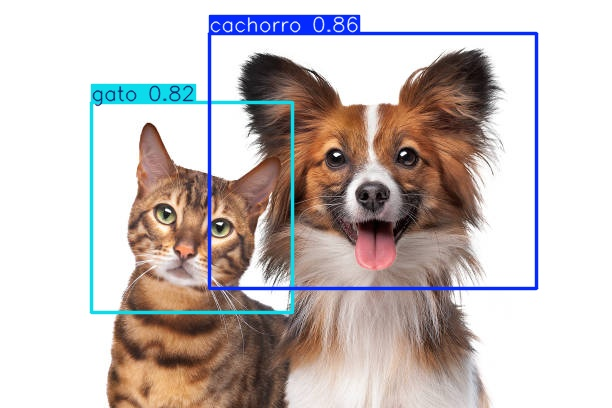

In [98]:
results = model('test/17.jpg')
results_image = results[0].plot()
result_image_rgb = cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB)
output_path = 'output.jpg'
cv2.imwrite(output_path, results_image)
Image(output_path)

In [50]:
model.save('cat_dog_model.pt')

In [87]:
input = 'video/video6.mp4'
output = 'output4.mp4'

cap = cv2.VideoCapture(input)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [88]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for output file
out = cv2.VideoWriter(output, fourcc, fps, (width, height))

In [89]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO inference on the current frame
    results = model(frame)

    # Plot the results on the frame
    result_frame = results[0].plot()  # Returns a frame with detections drawn

    # Write the processed frame to the output video
    out.write(result_frame)



0: 384x640 1 cachorro, 8.9ms
Speed: 8.0ms preprocess, 8.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cachorro, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cachorro, 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cachorro, 7.7ms
Speed: 2.2ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cachorro, 7.0ms
Speed: 1.6ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cachorro, 6.9ms
Speed: 1.7ms preprocess, 6.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cachorro, 6.6ms
Speed: 1.9ms preprocess, 6.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cachorro, 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 1.0ms postprocess per image at shape (1, 3, 38

In [90]:
cap.release()
out.release()